In [65]:
import random
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.layers import LSTM, Dropout
import datetime
import os
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.font_manager as fm

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [67]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [68]:
물가지수 = pd.read_csv('./기업연계데이터폴더/물가지수.csv')
주유소 = pd.read_csv('./기업연계데이터폴더/주유소.csv', encoding='cp949')
토마토 = pd.read_csv('./기업연계데이터폴더/train.csv')

In [69]:
물가지수

,Unnamed: 0,지수
0,0,95.232
1,1,95.232
2,2,95.232
3,3,95.232
4,4,95.232
...,...,...
1728,1728,100.740
1729,1729,100.740
1730,1730,100.740
1731,1731,100.740


In [70]:
주유소

,구분,고급휘발유,보통휘발유,자동차용경유,실내등유
0,2016년01월01일,1780.99,1407.15,1188.71,835.38
1,2016년01월02일,1781.69,1405.98,1187.91,834.11
2,2016년01월03일,1780.84,1405.33,1187.10,833.42
3,2016년01월04일,1780.73,1403.84,1185.85,832.00
4,2016년01월05일,1779.60,1402.25,1184.01,830.39
...,...,...,...,...,...
1728,2020년09월24일,1624.64,1345.28,1146.98,816.05
1729,2020년09월25일,1624.12,1344.43,1146.23,815.77
1730,2020년09월26일,1623.56,1343.87,1145.54,815.99
1731,2020년09월27일,1624.01,1343.59,1145.23,815.78


In [71]:
토마토가격 = 토마토[['토마토_가격(원/kg)']]
토마토가격

,토마토_가격(원/kg)
0,0.0
1,1621.0
2,0.0
3,1834.0
4,1833.0
...,...
1728,5587.0
1729,5596.0
1730,5262.0
1731,3781.0


In [72]:
중간단계 = pd.concat([주유소, 물가지수, 토마토가격], axis=1)

In [73]:
중간단계

,구분,고급휘발유,보통휘발유,자동차용경유,실내등유,Unnamed: 0,지수,토마토_가격(원/kg)
0,2016년01월01일,1780.99,1407.15,1188.71,835.38,0,95.232,0.0
1,2016년01월02일,1781.69,1405.98,1187.91,834.11,1,95.232,1621.0
2,2016년01월03일,1780.84,1405.33,1187.10,833.42,2,95.232,0.0
3,2016년01월04일,1780.73,1403.84,1185.85,832.00,3,95.232,1834.0
4,2016년01월05일,1779.60,1402.25,1184.01,830.39,4,95.232,1833.0
...,...,...,...,...,...,...,...,...
1728,2020년09월24일,1624.64,1345.28,1146.98,816.05,1728,100.740,5587.0
1729,2020년09월25일,1624.12,1344.43,1146.23,815.77,1729,100.740,5596.0
1730,2020년09월26일,1623.56,1343.87,1145.54,815.99,1730,100.740,5262.0
1731,2020년09월27일,1624.01,1343.59,1145.23,815.78,1731,100.740,3781.0


In [74]:
# 누가 봐도 없앨 건 Unnamed이다.
합친거 = 중간단계.drop('Unnamed: 0', axis=1)
합친거

,구분,고급휘발유,보통휘발유,자동차용경유,실내등유,지수,토마토_가격(원/kg)
0,2016년01월01일,1780.99,1407.15,1188.71,835.38,95.232,0.0
1,2016년01월02일,1781.69,1405.98,1187.91,834.11,95.232,1621.0
2,2016년01월03일,1780.84,1405.33,1187.10,833.42,95.232,0.0
3,2016년01월04일,1780.73,1403.84,1185.85,832.00,95.232,1834.0
4,2016년01월05일,1779.60,1402.25,1184.01,830.39,95.232,1833.0
...,...,...,...,...,...,...,...
1728,2020년09월24일,1624.64,1345.28,1146.98,816.05,100.740,5587.0
1729,2020년09월25일,1624.12,1344.43,1146.23,815.77,100.740,5596.0
1730,2020년09월26일,1623.56,1343.87,1145.54,815.99,100.740,5262.0
1731,2020년09월27일,1624.01,1343.59,1145.23,815.78,100.740,3781.0


In [75]:
# 0원인 칸의 위아래 평균을 구해서 채우는 코드를 몰라서 여기서는 그냥 0인 row를 없앴다.
# 나중에 이 코드 알게 된다면 이 부분만 바꾸면 된다.
제거대상 = 합친거[합친거['토마토_가격(원/kg)'] == 0].index
final = 합친거.drop(제거대상)
final

,구분,고급휘발유,보통휘발유,자동차용경유,실내등유,지수,토마토_가격(원/kg)
1,2016년01월02일,1781.69,1405.98,1187.91,834.11,95.232,1621.0
3,2016년01월04일,1780.73,1403.84,1185.85,832.00,95.232,1834.0
4,2016년01월05일,1779.60,1402.25,1184.01,830.39,95.232,1833.0
5,2016년01월06일,1779.69,1400.78,1182.44,828.66,95.232,1999.0
6,2016년01월07일,1776.63,1399.15,1180.44,826.77,95.232,1921.0
...,...,...,...,...,...,...,...
1728,2020년09월24일,1624.64,1345.28,1146.98,816.05,100.740,5587.0
1729,2020년09월25일,1624.12,1344.43,1146.23,815.77,100.740,5596.0
1730,2020년09월26일,1623.56,1343.87,1145.54,815.99,100.740,5262.0
1731,2020년09월27일,1624.01,1343.59,1145.23,815.78,100.740,3781.0


In [76]:
# 2020년09월01일까지 train에 보내고, 2020년09월02일부터 test로 보낸다.
final_train = final[:-24]
final_test = final[-24:]

In [77]:
feature = []
for i in final_train.columns:
    feature.append(i)
feature.remove('구분')
feature.remove('토마토_가격(원/kg)')
print(feature)

['고급휘발유', '보통휘발유', '자동차용경유', '실내등유', '지수']


/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N

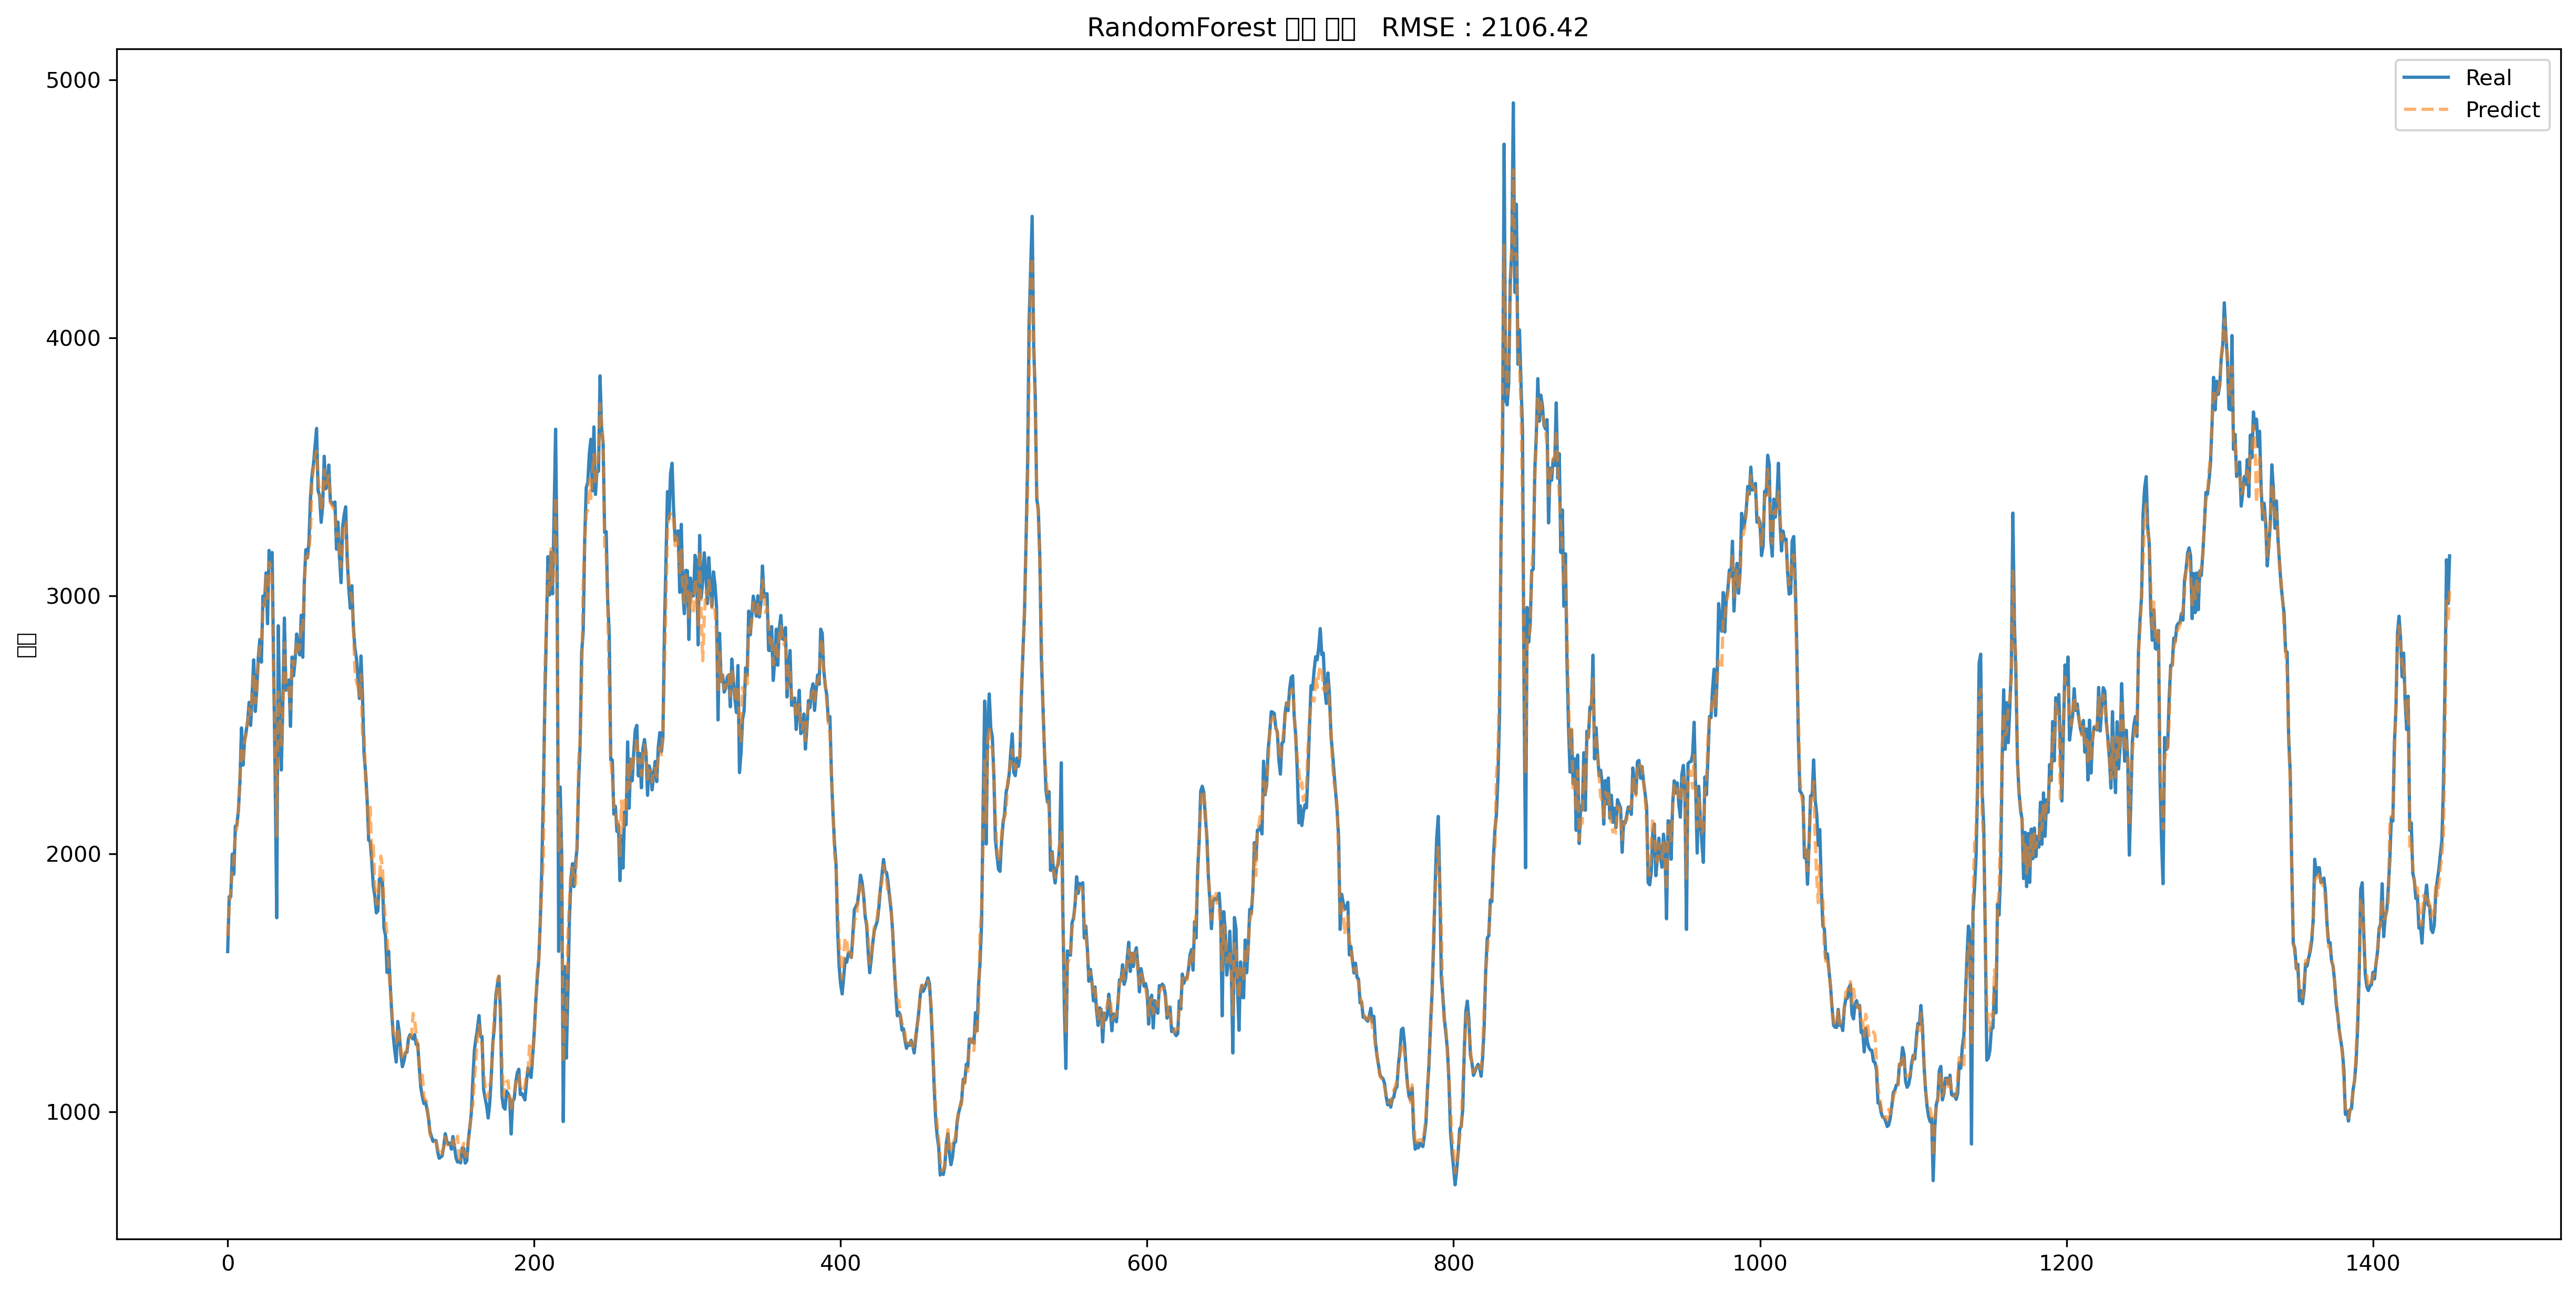

In [78]:
# RandomForest 사용하기
train_X = final_train[feature]
train_y = final_train['토마토_가격(원/kg)']
test_X = final_test[feature]
test_y = final_test['토마토_가격(원/kg)']

model = RandomForestRegressor()
model.fit(train_X, train_y)

y_pred = model.predict(test_X)
RMSE = mean_squared_error(test_y, y_pred) ** 0.5

plt.figure(figsize=(20, 10), dpi=300)
plt.title('RandomForest 예측 결과'+   '   RMSE : ' + str(RMSE)[:7])
plt.ylabel('가격')
plt.plot(np.array(train_y), alpha = 0.9, label = 'Real')
plt.plot(model.predict(train_X), alpha = 0.6, linestyle = "--", label = 'Predict')
plt.legend()
plt.show()

In [79]:
# LSTM 사용하기1
train_X = final_train[feature].values.reshape(-1,1,len(feature))
train_y = final_train['토마토_가격(원/kg)'].values.reshape(-1,1,1)
test_X = final_test[feature].values.reshape(-1,1,len(feature))
test_y = final_test['토마토_가격(원/kg)'].values.reshape(-1,1,1)

model = Sequential()
model.add(layers.Activation('relu'))
model.add(tf.compat.v1.keras.layers.LSTM(100, input_shape=(21,len(feature)), return_sequences=True))
model.add(Dropout(0.1))
model.add(layers.Dense(30))
model.add(Dropout(0.1))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(patience=30)
model.fit(train_X, train_y, epochs=1000, batch_size=32, validation_split = 0.1, callbacks=[early_stopping], verbose=1)

Epoch 1/1000
41/41 [==============================] - 1s 4ms/step - loss: 5167960.0000 - val_loss: 5718966.0000
Epoch 2/1000
41/41 [==============================] - 0s 1ms/step - loss: 5132132.5000 - val_loss: 5672758.0000
Epoch 3/1000
41/41 [==============================] - 0s 2ms/step - loss: 5078420.0000 - val_loss: 5605223.0000
Epoch 4/1000
41/41 [==============================] - 0s 2ms/step - loss: 5004747.5000 - val_loss: 5516544.5000
Epoch 5/1000
41/41 [==============================] - 0s 2ms/step - loss: 4911646.0000 - val_loss: 5406533.5000
Epoch 6/1000
41/41 [==============================] - 0s 2ms/step - loss: 4798175.0000 - val_loss: 5275723.0000
Epoch 7/1000
41/41 [==============================] - 0s 2ms/step - loss: 4663611.5000 - val_loss: 5126137.0000
Epoch 8/1000
41/41 [==============================] - 0s 2ms/step - loss: 4516529.5000 - val_loss: 4958819.5000
Epoch 9/1000
41/41 [==============================] - 0s 2ms/step - loss: 4351022.5000 - val_loss: 47768

/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N

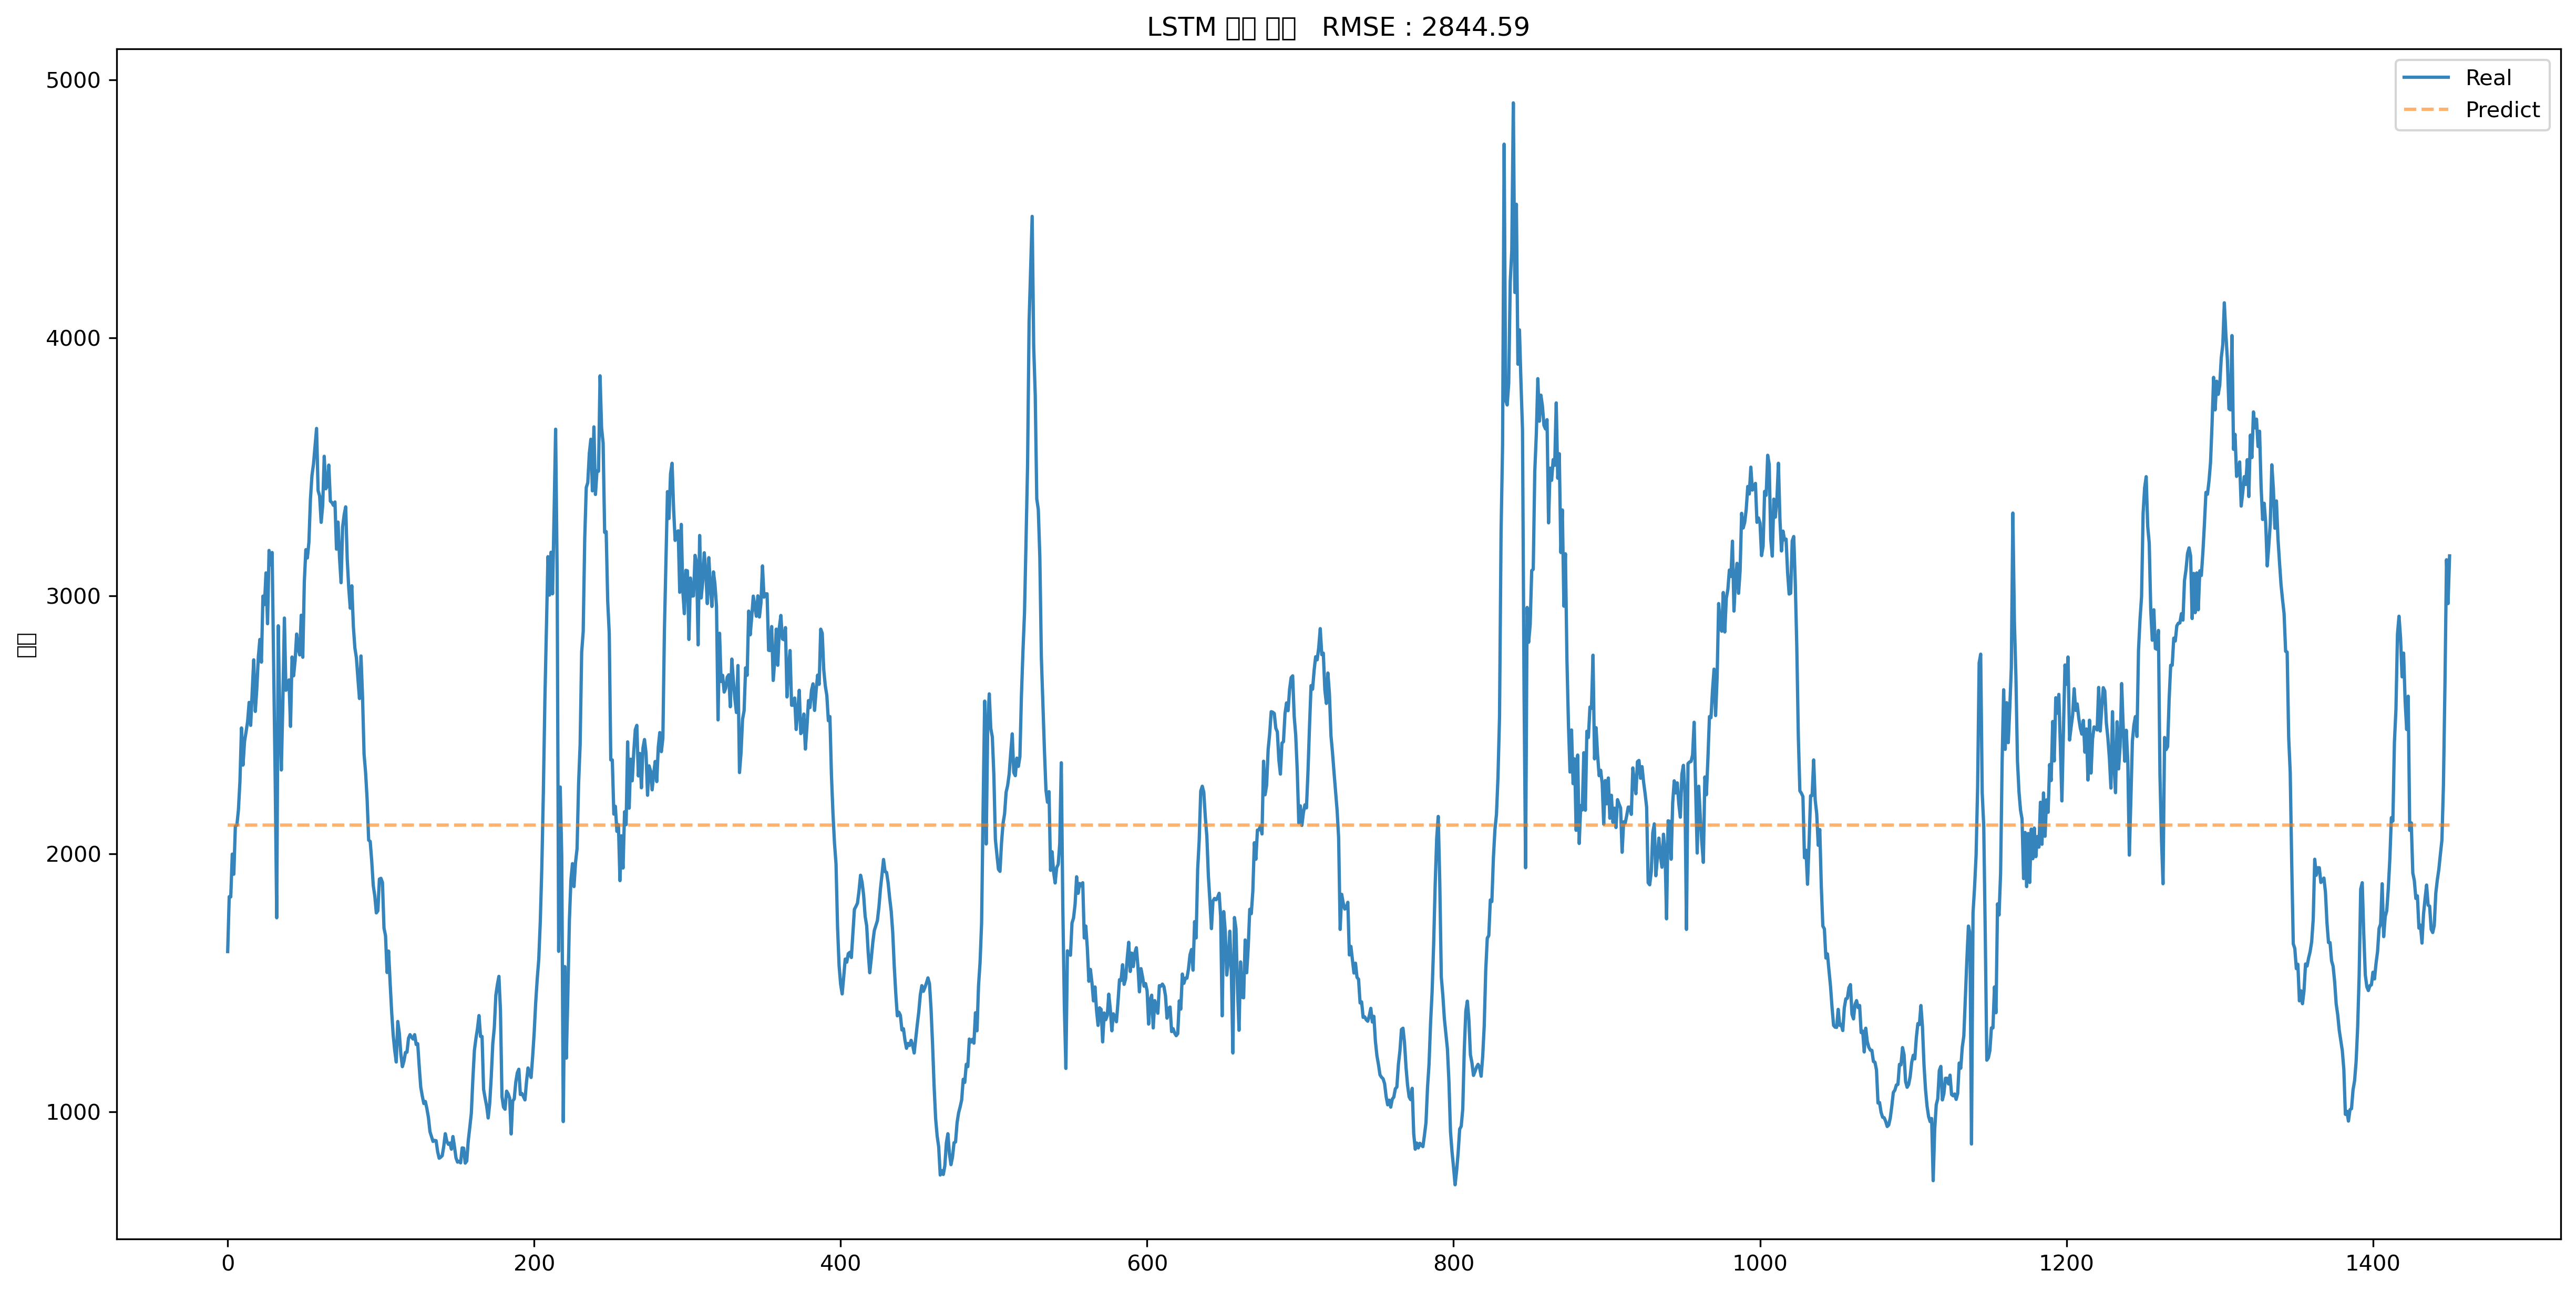

In [80]:
# LSTM 사용하기2
y_pred = model.predict(test_X)
RMSE = mean_squared_error(test_y.reshape(-1,1), y_pred.reshape(-1,1)) ** 0.5

plt.figure(figsize=(20, 10), dpi=300)
plt.title('LSTM 예측 결과'+   '   RMSE : ' + str(RMSE)[:7])
plt.ylabel('가격')
plt.plot(np.array(train_y.reshape(-1,1)), alpha = 0.9, label = 'Real')
plt.plot(model.predict(train_X).reshape(-1,1), alpha = 0.6, linestyle = "--", label = 'Predict')
plt.legend()
plt.show()

In [81]:
# 다중공선성 사용하기1
feature = final[['고급휘발유', '보통휘발유', '자동차용경유', '실내등유']]
target = final["토마토_가격(원/kg)"]

pd.DataFrame({
    "feature": feature.columns,
    "VIF": [variance_inflation_factor(feature.values, idx)
            for idx in range(feature.shape[1])]
})

model = LinearRegression().fit(feature, target)

pred = model.predict(feature)
rmse = np.round(mean_squared_error(target, pred) ** 0.5, 2)
rmse

827.29

In [82]:
# 다중공선성 사용하기2
sm_feature = sm.add_constant(feature)
model = sm.OLS(target, sm_feature).fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.107     
Dependent Variable: 토마토_가격(원/kg)     AIC:                24014.4430
Date:               2022-09-28 15:54 BIC:                24040.9251
No. Observations:   1475             Log-Likelihood:     -12002.   
Df Model:           4                F-statistic:        45.05     
Df Residuals:       1470             Prob (F-statistic): 1.00e-35  
R-squared:          0.109            Scale:              6.8674e+05
--------------------------------------------------------------------
          Coef.     Std.Err.     t      P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
const   -1099.1548  916.6767   -1.1991  0.2307  -2897.2886  698.9789
고급휘발유      -0.0170    0.9662   -0.0176  0.9859     -1.9124    1.8783
보통휘발유      10.4281    1.2505    8.3390  0.0000      7.9751   12.8811
자동차용경유    -18.0945    1.6902  -10.7054  0.0000    -21.4100  

In [83]:
# Lasso, Ridge, SGDClassifier 사용하기1
feature = final[['고급휘발유', '보통휘발유', '자동차용경유', '실내등유']]
target = final["토마토_가격(원/kg)"]

train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=0)

train_x, X_val, train_y, y_val = train_test_split(train_x, train_y, test_size=0.25, random_state=0)

reg1 = Lasso()
reg2 = Ridge()
clf = SGDClassifier()

reg1.fit(train_x, train_y)
reg2.fit(train_x, train_y)
clf.fit(train_x, train_y)

pred_train1 = reg1.predict(train_x)
pred_train2 = reg2.predict(train_x)
pred = clf.predict(train_x)

pred_val1 = reg1.predict(X_val)
pred_val2 = reg2.predict(X_val)

rmse_train1 = mean_squared_error(train_y, pred_train1) ** 0.5
rmse_val1 = mean_squared_error(y_val, pred_val1) ** 0.5
rmse_train2 = mean_squared_error(train_y, pred_train2) ** 0.5
rmse_val2 = mean_squared_error(y_val, pred_val2) ** 0.5

print("1. Lasso\t, train=%.4f, val=%.4f" % (rmse_train1, rmse_val1))
print("2. Ridge\t, train=%.4f, val=%.4f" % (rmse_train2, rmse_val2))
print("3. Linear Classifier, Accuracy for training : %.4f" % accuracy_score(train_y, pred))

1. Lasso	, train=822.0334, val=828.9588
2. Ridge	, train=822.0334, val=828.9620
3. Linear Classifier, Accuracy for training : 0.0078


/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.draw()
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  fig.canvas.draw()
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 55064 (\N{HANGUL SYLLABLE HWI}) missing from current font.
  fig.canvas.draw()
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.draw()
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.draw()
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/seaborn/ut

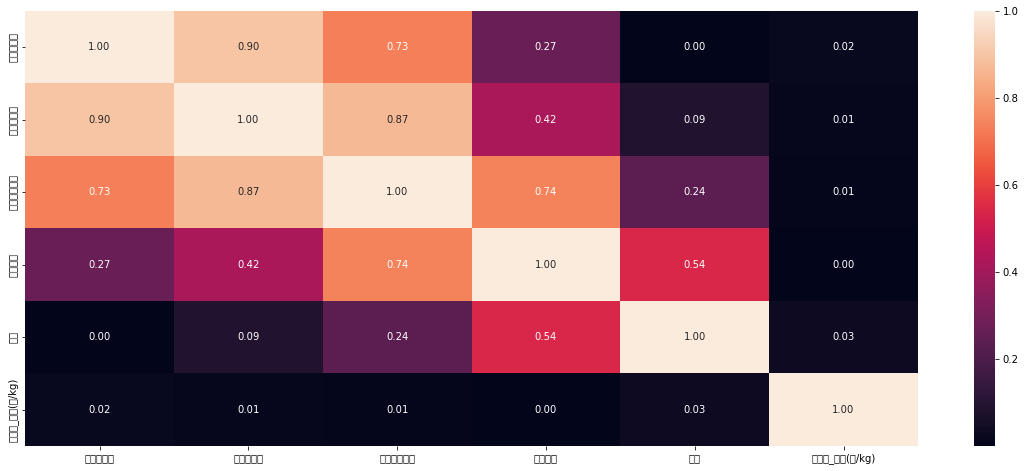

In [84]:
상관계수구하려고 = final.drop('구분', axis=1)
plt.figure(figsize=(20, 8))
sns.heatmap(상관계수구하려고.corr() ** 2, annot=True, fmt=".2f")
plt.show()